## 가설검정 연습문제

### 문제1
당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다. <br>
<br>
이 식빵의 무게는 `500g`이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다. <br>
<br>
1개월간 측정한 빵의 평균 무게는 `495.3g`이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

#### 데이터 가져오기

In [42]:
import pandas as pd
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

**********************

#### 추가 > 함수로 사용하기!

In [ ]:
# 함수가져오기
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import get_confidence_interval

******************

In [23]:
df = pd.read_excel("https://data.hossam.kr/E02/bread.xlsx")
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


#### 신뢰구간

In [3]:
clevel = 0.95

### 샘플 사이즈

In [4]:
n = len(df['무게'])
n

30

#### 자유도 (총관측지-1)

In [5]:
dof = n-1
dof

29

#### 표본 표준 평균

In [6]:
sample_mean = df['무게'].mean()
sample_mean

495.3666666666667

#### 표본 표준 편차

In [7]:
sample_std = df['무게'].std(ddof=1)
sample_std

3.557249357088388

#### 표본 표준 오차

In [8]:
# 표본표준편차 / n**0.5

from math import sqrt
sample_std_error = sample_std / sqrt(n)
sample_std_error

0.6494619051826865

#### 신뢰구간

In [10]:
cmin, cmax = t.interval(clevel, dof, sample_mean, sample_std_error )
cmin, cmax

(494.03836792675105, 496.6949654065823)

> 문제 1. 빵 무게의 95% 신뢰구간을 구하고 시각화 하시오.

In [11]:
# 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.unicode_minus'] = False

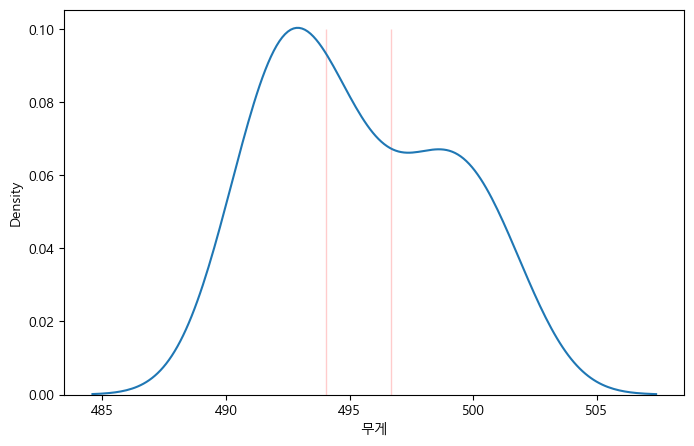

In [33]:
sb.kdeplot(x=df['무게'])
sb.lineplot(x =[cmin,cmin], y=[0, 0.1],color='red')
sb.lineplot(x=[cmax,cmax],y=[0,0.1],color='red')
plt.show()
plt.close()

***********************

#### 추가 > 모듈화 한 기능 사용하기

In [ ]:
cmin, cmax = get_confidence_interval(df['무게'])
cmin, cmax

**************

> 문제 2. 지금까지 당신이 구입한 빵의 평균 무게가 500g보다 작다면 컴플레인을 걸고자 한다. 컴플레인을 걸어야 할지 결정하시오.

In [35]:
from scipy import stats

> #### 1. 가설 설정 - 귀무가설 : 빵의 무게가 500g보다 작지 않다.
> 가설설정 <br>
> 빵의무게 : $\mu$ <br>
> 귀무가설($H_0$) :  $\mu > 500$ <br>
> 대립가설($H_1$) : $\mu < 500$ <br>

In [38]:
t, p = stats.ttest_1samp(df['무게'], 500, alternative='less')
"t-statistic: {:.3f}, p-value: {:.3f}".format(t, p)

't-statistic: -7.134, p-value: 0.000'

alternative(귀무가설이)가 발생할 확률이 100% => 무조건 500보다 작다.(대립가설 채택)

 > 무조건 500보다 크지 않다.

> #### 2. 가설 설정 - 귀무가설 : 빵의 무게가 500g보다 크지 않다.
> 가설설정 <br>
> 빵의무게 : $\mu$ <br>
> 귀무가설($H_0$) :  $\mu < 500$ <br>
> 대립가설($H_1$) : $\mu > 500$ <br>

In [41]:
t, p = stats.ttest_1samp(df['무게'], 500, alternative='greater')
"t-statistic: {:.3f}, p-value: {:.3f}".format(t, p)

't-statistic: -7.134, p-value: 1.000'

alternative가 발생할 확률이 0% 

##### => p-value 1.000 이므로 귀무가설 채택 (p-value가 1이므로 귀무가설을 기각할 이유가 없다는 것과 마찬가지) => 빵의 무게가 500g보다 크지 않다!

 > 무조건 500보다 작다

> #### 3. 가설 설정 - 귀무가설: 빵의 무게가 500g과 차이가 없다.

In [40]:
t, p = stats.ttest_1samp(df['무게'], 500, alternative = 'two-sided')
"t-statistic: {:.3f}, p-value: {:.3f}".format(t, p)

't-statistic: -7.134, p-value: 0.000'

alternative(귀무가설이)가 발생할 확률이 100%  => p=value가 0이라는 것은 검정하는 가설이 완전히 거부되어야 한다는 것을 의미 (=대립가설 채택 : 차이가 있다!)
 > 무조건 500은 아님

> #### 4. 결론 : 클레임을 걸어야 한다.